In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
stop_words = nltk.corpus.stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [91]:
df = pd.read_csv('../data/Exam_NLP.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [93]:
# fill missing values for overview and tagline
df['overview'] = df['overview'].fillna('')
df['tagline'] = df['tagline'].fillna('')

df['description'] = df['overview'] + df['tagline']
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"John Carter is a war-weary, former military ca..."


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [95]:
# function to tokenize text
def token_pro(text):
    if pd.notna(text):  # Check if the text is not NaN
        tokens = word_tokenize(text) # Tokenize the text
        tokens = [word.lower() for word in tokens]  # Convert to lowercase
        tokens = [word.strip() for word in tokens]  # Remove whitespaces
        tokens = [word for word in tokens if word.isalnum()]  # Filter out non-alphanumeric words
        tokens = [word for word in tokens if not word in stop_words]  # Remove stopwords
        return tokens
    else:
        return []  # Return an empty list for NaN values

In [96]:
# Example usage to process the 'description' column
df['description'] = df['description'].apply(token_pro)

In [97]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[22nd, century, paraplegic, marine, dispatched..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[captain, barbossa, long, believed, dead, come..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[cryptic, message, bond, past, sends, trail, u..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[following, death, district, attorney, harvey,..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[john, carter, former, military, captain, inex..."


In [102]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['description'].apply(lambda x: ' '.join(x)))
bow = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
bow

,00,000,007,10,100,1000,1001,10th,11,117,...,zorro,zuckerberg,zula,zuzu,zwei,zyklon,æon,éloigne,émigré,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
tfidf_vectorizer = CountVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['description'].apply(lambda x: ' '.join(x)))
tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf

,00,000,007,10,100,1000,1001,10th,11,117,...,zorro,zuckerberg,zula,zuzu,zwei,zyklon,æon,éloigne,émigré,única
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
from time import time
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [108]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a range of candidate topic numbers
param_grid = {'n_components': [5, 10, 15, 20, 25]}

# Create an LDA model
lda = LatentDirichletAllocation(
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

# Perform grid search with cross-validation to find the best number of topics
grid_search = GridSearchCV(lda, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(bow)

# Print the best number of topics and corresponding perplexity score
best_n_topics = grid_search.best_params_['n_components']
best_perplexity = grid_search.best_score_
print(f"Best Number of Topics: {best_n_topics}")
print(f"Best Perplexity Score: {best_perplexity:.2f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV] END ....................................n_components=15; total time=  44.5s
[CV] END ....................................n_components=10; total time=  46.2s
[CV] END ....................................n_components=15; total time=  46.4s
[CV] END ....................................n_components=10; total time=  46.7s
[CV] END ....................................n_components=10; total time=  47.4s
[CV] END ....................................n_components=10; total time=  47.4s
[CV] END ....................................n_components=10; total time=  47.5s
[CV] END .....................................n_components=5; total time=  49.0s
[CV] END .....................................n_components=5; total time=  49.8s
[CV] END .....................................n_components=5; total time=  50.9s
[CV] END .....................................n_components=5; total time=  51.4s
[CV] END .....................................n_components=5; total time=  51.4s
[CV] END ...................

done in 10.592s.


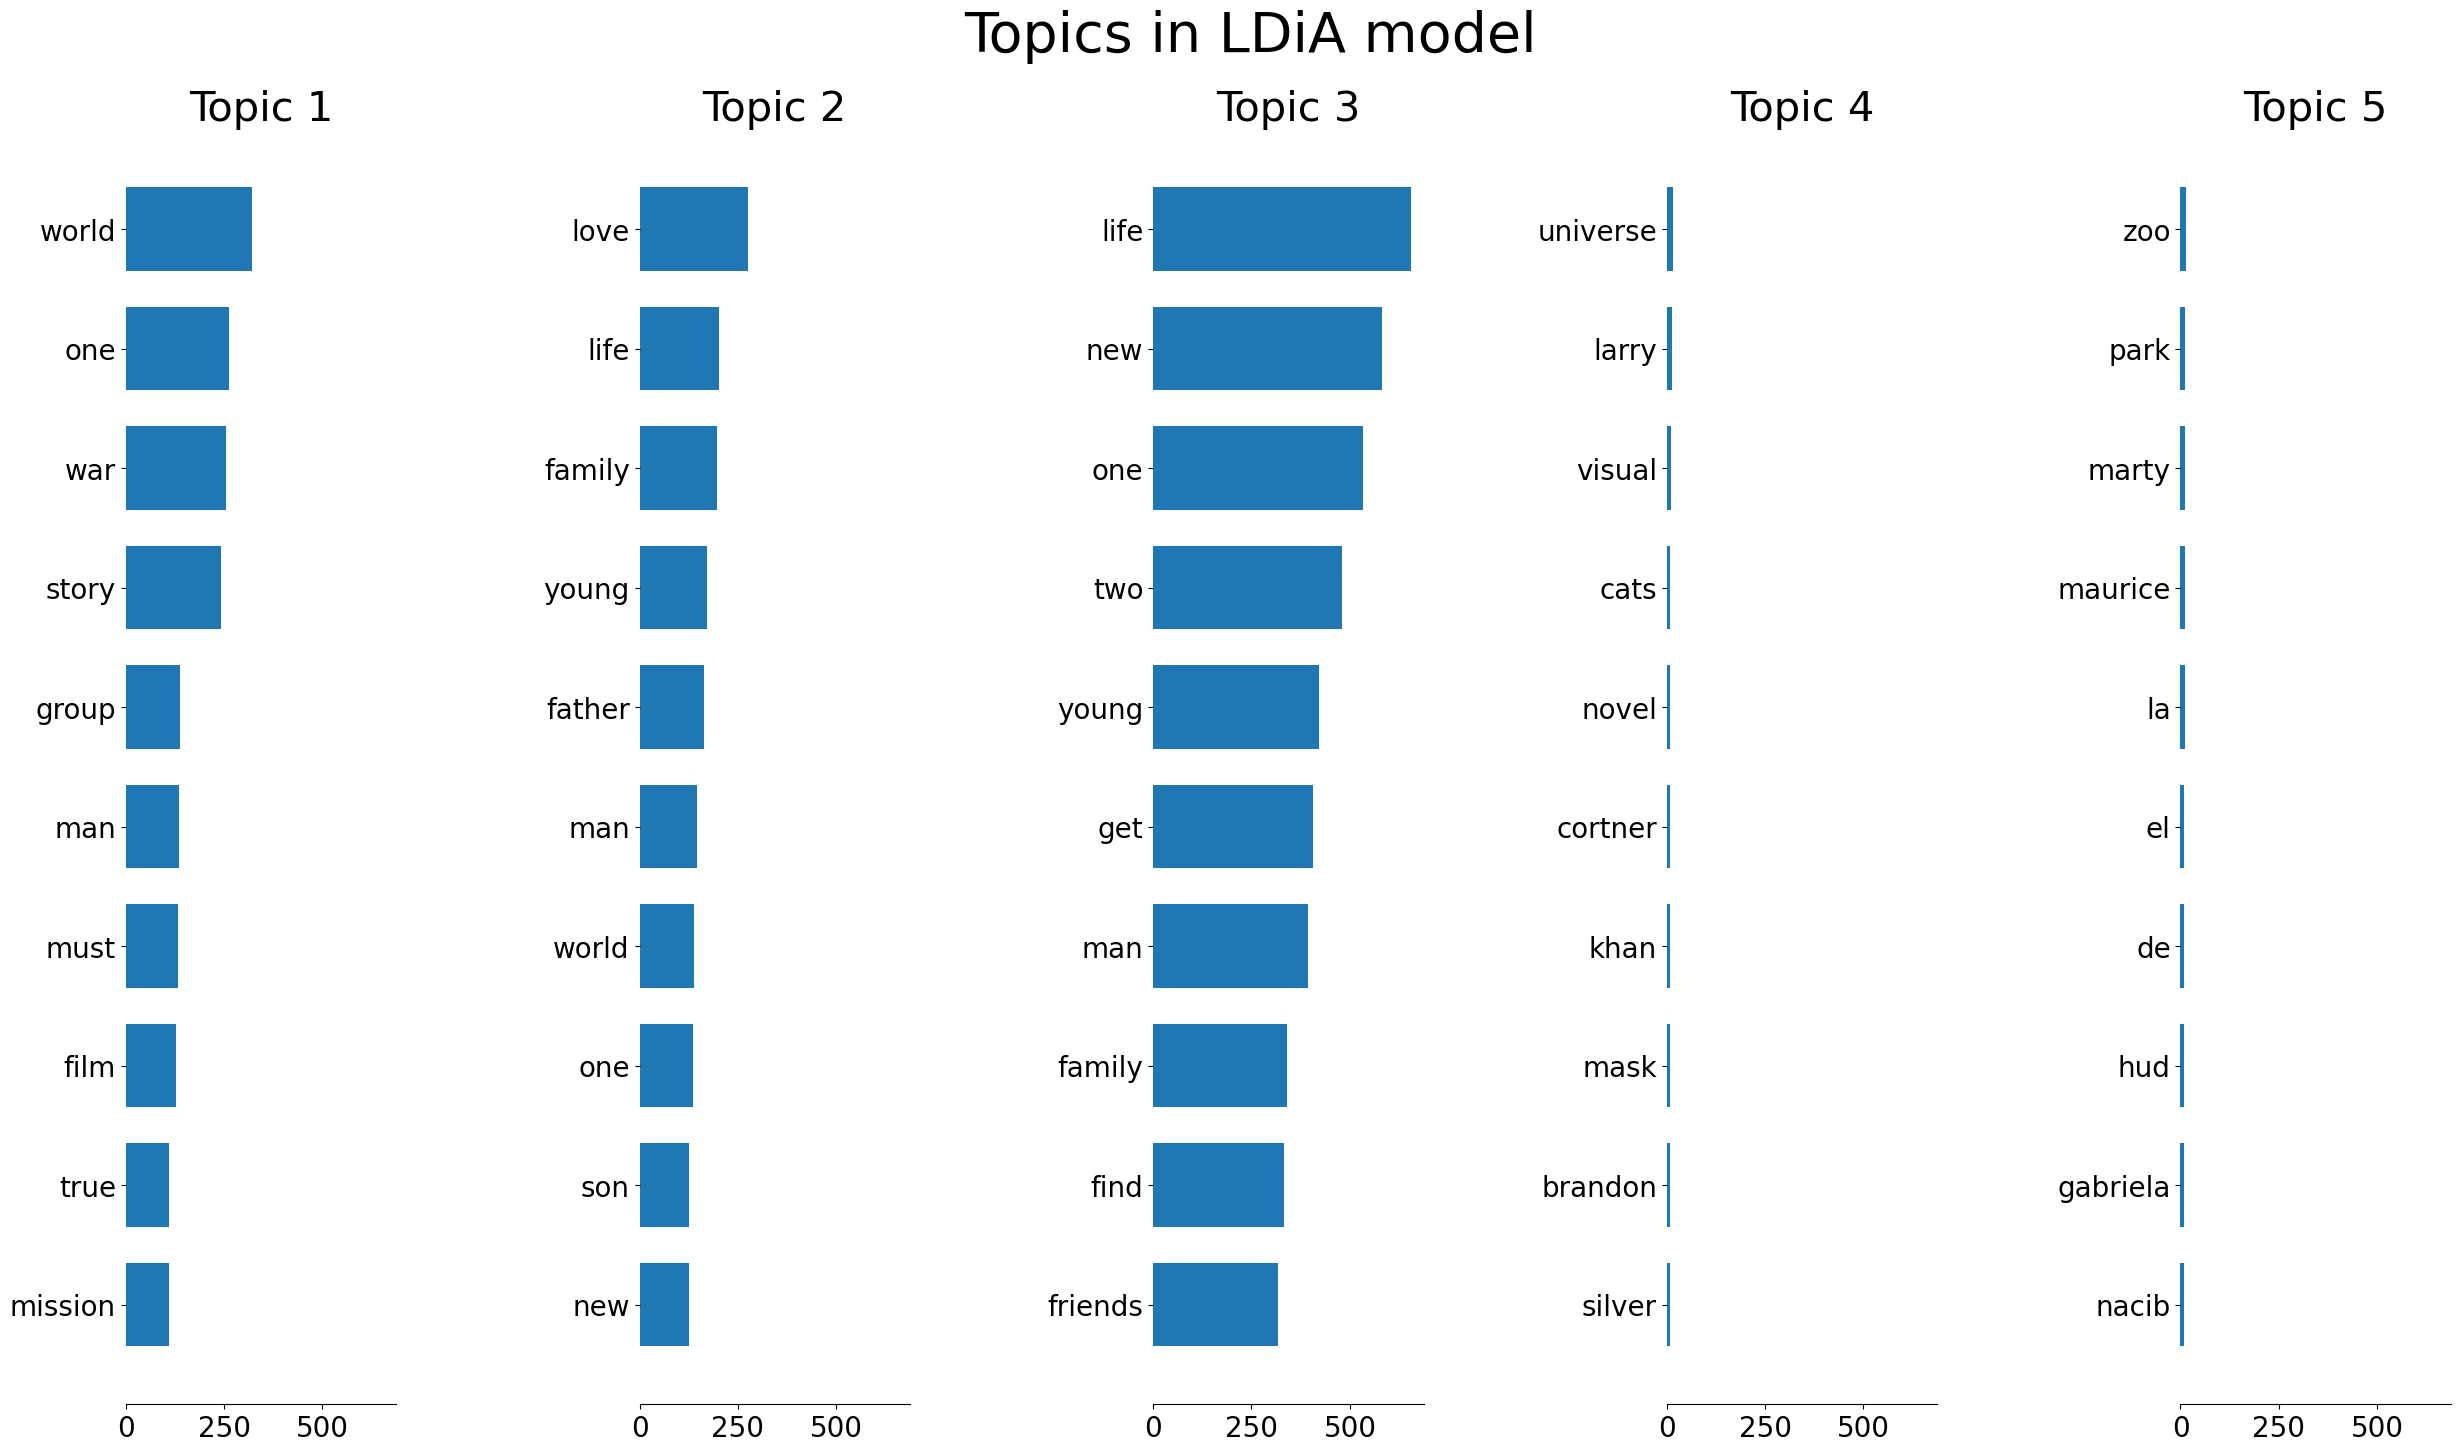

In [114]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=5,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(bow)
print("done in %0.3fs." % (time() - t0))

bow_feature_names = bow_vectorizer.get_feature_names_out()
plot_top_words(lda, bow_feature_names, 10 , "Topics in LDiA model")

In [138]:
from gensim.models import Word2Vec

# Train a Word2Vec model
#training parameters
num_features = 300
min_word_count = 3
num_workers = 2
window_size = 6
subsampling = 1e-3
# model = Word2Vec(token_list)

model = Word2Vec(sentences=df['description'], vector_size=100, window=5, min_count=1, workers=4)
# model = Word2Vec(token_list)
model.init_sims()

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_42936/1778946869.py:14: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims()


In [139]:
list(model.wv.index_to_key)

['one',
 'life',
 'new',
 'world',
 'man',
 'young',
 'story',
 'two',
 'love',
 'family',
 'find',
 'must',
 'get',
 'time',
 'back',
 'years',
 'father',
 'friends',
 'finds',
 'way',
 'film',
 'help',
 'woman',
 'lives',
 'war',
 'town',
 'home',
 'school',
 'take',
 'city',
 'becomes',
 'first',
 'make',
 'three',
 'son',
 'become',
 'never',
 'girl',
 'friend',
 'save',
 'true',
 'takes',
 'mother',
 'best',
 'set',
 'people',
 'group',
 'wife',
 'go',
 'together',
 'team',
 'soon',
 'day',
 'gets',
 'begins',
 'old',
 'york',
 'comes',
 'death',
 'secret',
 'american',
 'daughter',
 'former',
 'men',
 'high',
 'come',
 'evil',
 'last',
 'boy',
 'named',
 'mysterious',
 'discovers',
 'like',
 'little',
 'night',
 'small',
 'police',
 'earth',
 'movie',
 'work',
 'real',
 'battle',
 'mission',
 'everything',
 'meets',
 'wants',
 'stop',
 'house',
 'year',
 'agent',
 'journey',
 'job',
 'even',
 'big',
 'fight',
 'end',
 'goes',
 'past',
 'murder',
 'good',
 'could',
 'living',
 'ev

In [124]:
model.wv.most_similar('ocean')

[('revenge', 0.9991664886474609),
 ('journey', 0.9991616606712341),
 ('forces', 0.99916011095047),
 ('two', 0.99916011095047),
 ('seems', 0.9991578459739685),
 ('stop', 0.9991526007652283),
 ('four', 0.9991499781608582),
 ('around', 0.9991494417190552),
 ('named', 0.9991483092308044),
 ('become', 0.9991459250450134)]

In [126]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
print(tfidf.shape)
svd_topic_vectors = svd.fit_transform(tfidf)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors)
svd_topic_vectors.round(3).head(16)


(4803, 21004)


,0,1,2,3,4
0,0.359,-0.318,-0.342,-0.439,0.622
1,0.915,0.473,-0.255,-0.322,0.854
2,0.740,-0.494,0.671,0.134,0.076
3,0.819,-0.303,-0.783,0.825,0.211
4,0.819,-0.657,-0.659,-0.860,1.237
5,0.453,0.087,-0.016,-0.134,-0.097
6,0.678,-0.144,-0.483,0.644,0.201
7,0.829,-0.259,-0.559,0.616,0.315
8,0.354,0.014,-0.095,0.016,-0.104
9,1.214,-0.938,-0.097,0.248,1.065


In [133]:
def truncated_svd_elbow(n_components, words_cooc_matrix, print_elbow = True):
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
    svd.fit(words_cooc_matrix)  
    #print(svd.explained_variance_ratio_) 
    
    if(print_elbow):
        plt.plot(np.arange(0,n_components), svd.explained_variance_ratio_)    
        #for xy in zip(np.arange(0,top_n-1), np.round(svd.explained_variance_ratio_,3)):    
        #    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')    
        plt.xlabel('n_components')
        plt.ylabel('explained_variance_ratio_')
        title = "elbow for truncated svd with n_components " + str(n_components)
        plt.title(title)
        plt.show()
    
    U = svd.transform(words_cooc_matrix)  
    Sigma = svd.singular_values_
    VT = svd.components_
    return U,Sigma,VT

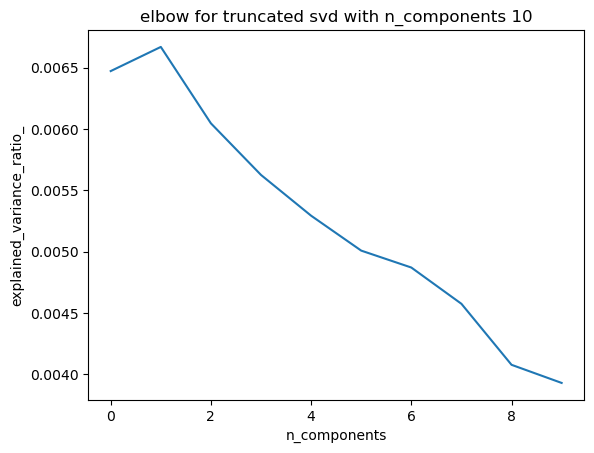

The best elbow point is 0


In [135]:
# get the elbow for truncated SVD
U,Sigma,VT = truncated_svd_elbow(10, tfidf, print_elbow = True)

# get the best elbow point and print the number
print("The best elbow point is " + str(np.argmax(Sigma)))